# **APARTADO 2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

url_gdp = "https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/total-healthcare-expenditure-gdp.csv"
url_life_expectancy = "https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/life-expectancy-unwpp.csv"
url_infant_mortality = "https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/child-mortality-igme.csv"
url_population = "https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/population-and-demography.csv"

# Lectura de ficheros
df_gdp = pd.read_csv(url_gdp)
df_life_expectancy = pd.read_csv(url_life_expectancy)
df_infant_mortality = pd.read_csv(url_infant_mortality)
df_population = pd.read_csv(url_population)


# Filtrado de datos para mantener el año 2021 y los códigos que no sean NaN
data_gdp = df_gdp[(df_gdp['Year'] == 2021) & (pd.notna(df_gdp['Code']))]
data_life_expectancy = df_life_expectancy[(df_life_expectancy['Year'] == 2021) & (pd.notna(df_life_expectancy['Code']))]
data_infant_mortality = df_infant_mortality[(df_infant_mortality['Year'] == 2021) & (pd.notna(df_infant_mortality['Code']))]
data_population = df_population[(df_population['Year'] == 2021) & (pd.notna(df_population['Code']))]

# Unión de los dataframe para únicamente guardar paises con datos en los 4 dataframes.
merged_data = data_gdp.merge(data_life_expectancy, on='Code', suffixes=('', '_life_expectancy'))
merged_data = merged_data.merge(data_infant_mortality, on='Code', suffixes=('', '_infant_mortality'))
merged_data = merged_data.merge(data_population, on='Code', suffixes=('', '_population'))

# Eliminación de columnas con datos repetidos
merged_data = merged_data.drop(columns=['Entity_life_expectancy', 'Year_life_expectancy', 'Entity_infant_mortality', 'Year_infant_mortality', 'Entity_population', 'Year_population'])

# Renombrado de columnas para mantener unos nombres más intuitivos
merged_data.rename(columns={
    'Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)': 'GDP_percentage',
    'Life expectancy - Sex: all - Age: 0 - Variant: estimates': 'Life_Expectancy',
    'Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births': 'Infant_Mortality_Rate',
    'Population - Sex: all - Age: all - Variant: estimates': 'Population'
}, inplace=True)

merged_data.head()

,Entity,Code,Year,GDP_percentage,Life_Expectancy,Infant_Mortality_Rate,Population
0,Afghanistan,AFG,2021,21.83,60.417,5.960755,40000411
1,Albania,ALB,2021,7.27,76.844,0.945740,2849643
2,Algeria,DZA,2021,5.53,75.208,2.233761,44761101
3,Andorra,AND,2021,8.33,82.331,0.278005,78375
4,Angola,AGO,2021,2.96,62.958,6.912662,34532427


In [ ]:
corr_life_expectancy = np.corrcoef(merged_data['Life_Expectancy'], merged_data['GDP_percentage'])[0, 1]
corr_infant_mortality = np.corrcoef(merged_data['Infant_Mortality_Rate'], merged_data['GDP_percentage'])[0, 1]

print(f"Coeficiente Pearson entre 'Porcentaje PIB' y 'Esperanza de vida': {corr_life_expectancy}")
print(f"Coeficiente Pearson entre 'Porcentaje PIB' y 'Mortalidad infantil': {corr_infant_mortality}")

Coeficiente Pearson entre 'Porcentaje PIB' y 'Esperanza de vida': 0.23701271424382864
Coeficiente Pearson entre 'Porcentaje PIB' y 'Mortalidad infantil': -0.25069294275708015


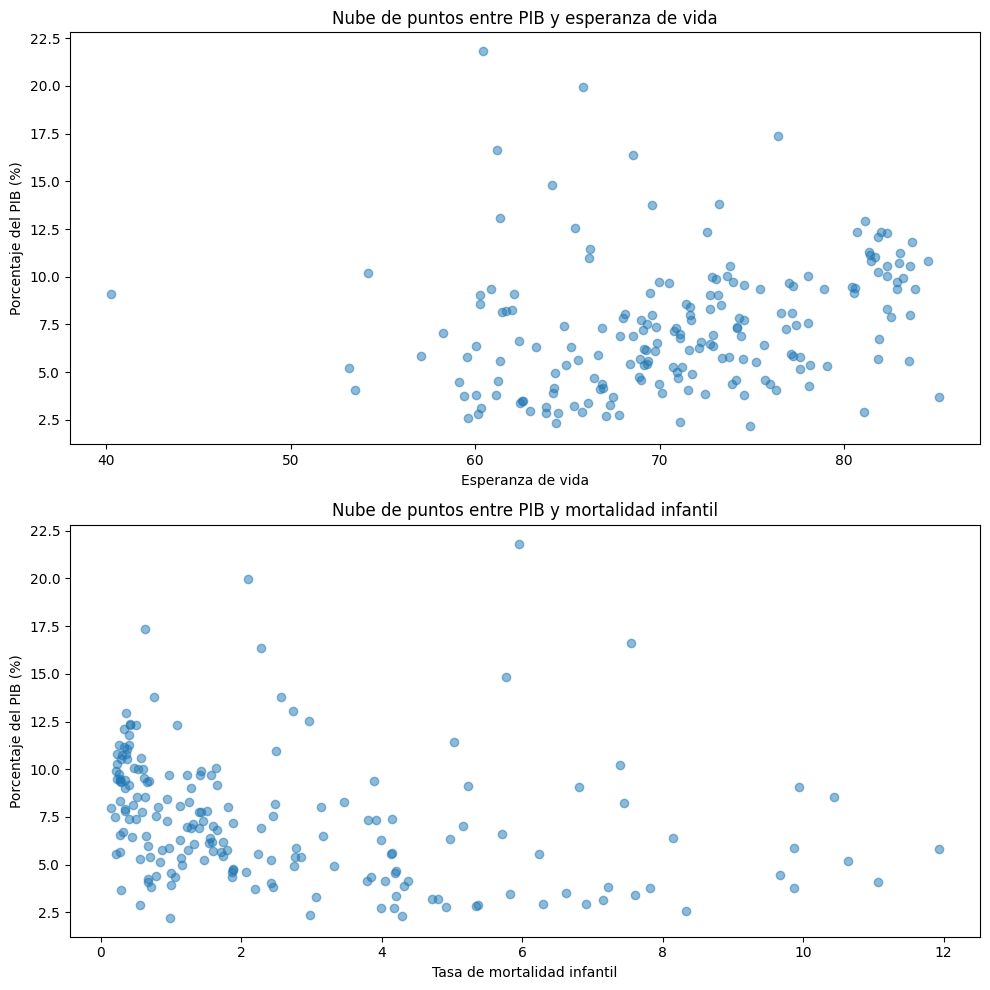

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10,10))

axes[0].scatter(merged_data['Life_Expectancy'], merged_data['GDP_percentage'], alpha=0.5)
axes[0].set_title('Nube de puntos entre PIB y esperanza de vida')
axes[0].set_xlabel('Esperanza de vida')
axes[0].set_ylabel('Porcentaje del PIB (%)')

axes[1].scatter(merged_data['Infant_Mortality_Rate'], merged_data['GDP_percentage'], alpha=0.5)
axes[1].set_title('Nube de puntos entre PIB y mortalidad infantil')
axes[1].set_xlabel('Tasa de mortalidad infantil')
axes[1].set_ylabel('Porcentaje del PIB (%)')

plt.tight_layout()
plt.show()

La información que recibimos del coeficiente de Pearson nos da una información general de lo que está sucediendo en este caso. Y además gracias a las nubes de puntos podemos acceder a esta información de manera más detallada y visual.

Al comparar el PIB con la esperanza de vida, obtenemos un coeficiente de 0'24, lo que indica que no hay una relación fuerte entre el PIB y la esperanza de vida. Sin embargo, como el valor es positivo y está cerca de 1, sugiere una ligera tendencia a que cuando el PIB sube, también lo hace la esperanza de vida, aunque de manera débil.

En cambio, al comparar el PIB con la mortalidad infantil, el coeficiente es -0'25, lo que muestra una relación débil pero inversa. Esto significa que, aunque no haya una gran correlación, hay una pequeña tendencia a que a medida que el PIB aumenta, la mortalidad infantil disminuye.

En conclusión, parece que la hipótesis inicial es correcta: a mayor inversión en el PIB, mayor esperanza de vida y menor mortalidad infantil. Pero hay que tener en cuenta que estas relaciones no son muy fuertes y no se pueden tomar como algo definitivo.

In [ ]:
# Función que calcula la correlación ponderada
def weighted_corr(x, y, weights):
  average_x = np.average(x, weights=weights)
  average_y = np.average(y, weights=weights)

  cov_xy = np.sum(weights * (x - average_x) * (y - average_y)) / np.sum(weights)
  var_x = np.sum(weights * (x - average_x) ** 2) / np.sum(weights)
  var_y = np.sum(weights * (y - average_y) ** 2) / np.sum(weights)

  return cov_xy / np.sqrt(var_x * var_y)

weighted_life_expectancy = weighted_corr(merged_data['Life_Expectancy'], merged_data['GDP_percentage'], merged_data['Population'])
weighted_infant_mortality = weighted_corr(merged_data['Infant_Mortality_Rate'], merged_data['GDP_percentage'], merged_data['Population'])

print(f"Coeficiente de correlación ponderada entre 'Porcentaje PIB' y 'Esperanza de vida': {weighted_life_expectancy}")
print(f"Coeficiente de correlación ponderada entre 'Porcentaje PIB' y 'Mortalidad infantil': {weighted_infant_mortality}")


Coeficiente de correlación ponderada entre 'Porcentaje PIB' y 'Esperanza de vida': 0.41000225954534836
Coeficiente de correlación ponderada entre 'Porcentaje PIB' y 'Mortalidad infantil': -0.2590688533929351


Hay una diferencia notable en el coeficiente de correlación ponderado que relaciona el PIB con la esperanza de vida. Vemos un claro aumento demostrando que al incrementar el PIB la esperanza de vida también aumenta.

En cambio en lo que a la mortalidad infantil se refiere no vemos diferencia alguna comparando con el coeficente de correlación anterior. La conclusión que podemos sacar de estos datos es que la población no afecta de manera significativa a la mortalidad infantil.